In [31]:
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_path='c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [44]:
DIR_DATA = './AIFrenz_Season1_dataset/'
DIR_TRAIN = DIR_DATA + 'train.csv'
DIR_TEST = DIR_DATA + 'test.csv'

In [45]:
train = pd.read_csv(DIR_TRAIN)

print(train.shape)
display(train.head())

(4752, 60)


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [46]:
temp = ['X00', 'X07', 'X28', 'X31', 'X32']
localP = ['X01', 'X06', 'X22', 'X27', 'X29']
windV = ['X02', 'X03', 'X18', 'X24', 'X26']
rain = ['X04', 'X10', 'X21', 'X36', 'X39']
seaP = ['X05', 'X08', 'X09', 'X23', 'X33']
solar = ['X11', 'X14', 'X16', 'X19', 'X34']
humi = ['X12', 'X20', 'X30', 'X37', 'X38']
windD = ['X13', 'X15', 'X17', 'X25', 'X35']
sensor = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04',
          'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 
          'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 
          'Y15', 'Y16', 'Y17']

In [47]:
X_train = train.loc[:, 'X00':'X39']

print(X_train.shape)
display(X_train.head())

(4752, 40)


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,...,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,...,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,...,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,...,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,...,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0


4792 



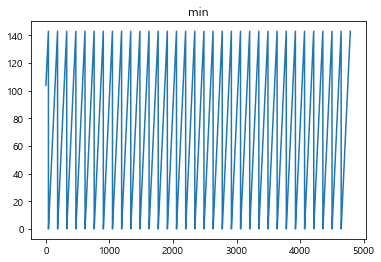

In [48]:
# 
minute = (train.index%144).astype(int)
minute = minute.tolist()*2
minute = minute[4712:]
print(len(minute), '\n')

t1 = range(len(minute))

plt.plot(t1, minute)
plt.title('min')
plt.show()

4792 



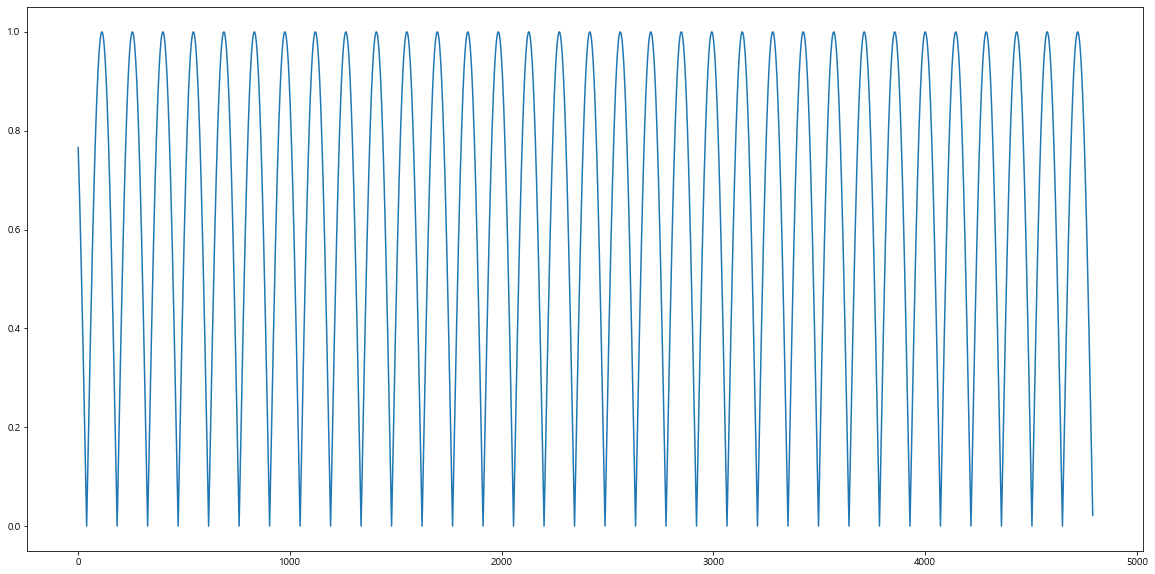

In [49]:
minute = np.array(minute)
minute_sin = np.sin(np.pi*minute/144)
t2 = range(len(minute_sin))

print(len(minute_sin), '\n')

plt.figure(figsize=(20,10))
plt.plot(t2, minute_sin)

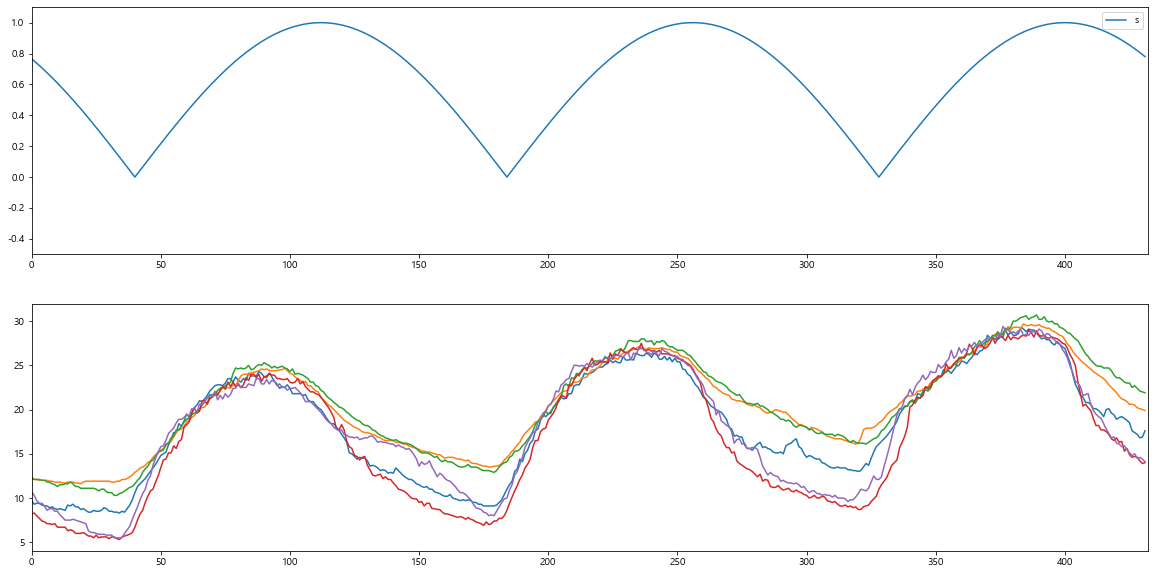

In [50]:
df = X_train[temp].iloc[0:144*3]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(t2[:144*3], minute_sin[:144*3])
ax1.set_ylim(-0.5, 1.1)
ax1.set_xlim(0,144*3)
ax1.legend('sin func')

ax2.plot(df)
ax2.set_xlim(0,144*3)

plt.show()

In [40]:
print(X_train[windD[0]].mean())
print(X_train[windD[1]].mean())
print(X_train[windD[2]].mean())
print(X_train[windD[3]].mean())
print(X_train[windD[4]].mean())

161.35763888888889
174.34665404040402
161.82386363636363
139.52445286195285
208.40050505050507


In [51]:
X_train[windD] = X_train[windD]/365

In [52]:
print(X_train[windD[0]].mean())

0.44207572298325726


(0, 144)

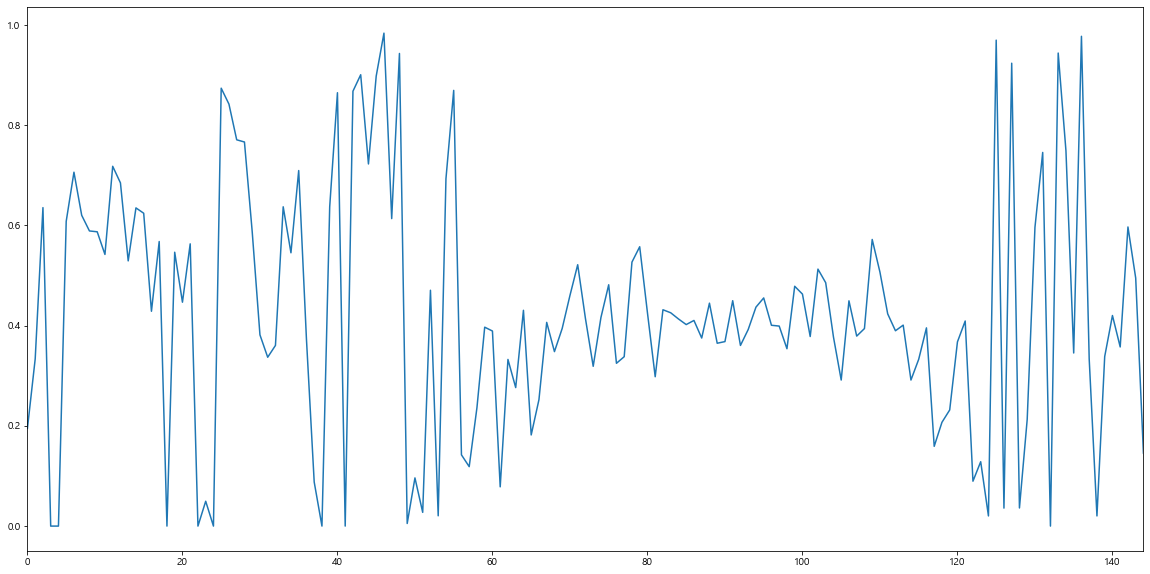

In [54]:
X_train[windD[0]].plot(figsize=(20,10))
plt.xlim(0, 144)

In [42]:
# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.mean()
STD = X_train.std()

# 표준편차가 0일 경우 대비하여 1e-07 추가
X_train = (X_train - MEAN) / (STD + 1e-07)

print(X_train.shape)
print('X_train head')
display(X_train.head())
print()
print('X_train tail')
display(X_train.tail())

(4752, 40)
X_train head


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,-2.236377,0.053243,-0.288997,-0.911345,-0.286742,0.284562,0.174782,-2.160752,0.315216,0.396435,...,0.159919,-2.109779,-1.766623,0.297981,-1.015881,0.482017,-0.274946,0.577720,0.240703,-0.234576
1,-2.321347,0.083006,0.177482,0.477320,-0.286742,0.284562,0.174782,-2.183598,0.343622,0.424634,...,0.215666,-2.091664,-1.842501,0.297981,-1.015881,0.070290,-0.274946,0.582841,0.289700,-0.234576
2,-2.300105,0.112769,-0.382293,0.904602,-0.286742,0.255107,0.204162,-2.183598,0.372029,0.481033,...,0.271413,-2.146009,-1.956318,0.268916,-1.015881,0.269124,-0.274946,0.582841,0.311477,-0.234576
3,-2.300105,0.083006,-0.009110,-0.804525,-0.286742,0.255107,0.174782,-2.206443,0.343622,0.452834,...,0.350389,-2.200355,-2.013226,0.297981,-1.015881,0.056231,-0.274946,0.593083,0.344142,-0.234576
4,-2.342589,0.083006,-0.662181,0.263679,-0.286742,0.255107,0.204162,-2.206443,0.372029,0.452834,...,0.401490,-2.254700,-2.013226,0.297981,-1.015881,-0.336416,-0.274946,0.618688,0.371363,-0.234576



X_train tail


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
4747,-0.069655,-0.303908,-0.568885,-0.697704,-0.286742,-0.422352,-0.383432,0.009577,-0.366541,-0.28035,...,1.126205,-0.388845,-0.173188,-0.457686,0.930244,0.102425,-0.274946,0.838894,0.022936,-0.126289
4748,-0.069655,-0.303908,-0.942069,-0.804525,-0.286742,-0.451807,-0.383432,-0.013269,-0.366541,-0.28035,...,1.191244,-0.388845,-0.154219,-0.457686,0.930244,-0.468972,-0.274946,0.849136,0.050157,-0.126289
4749,-0.112139,-0.274146,-0.568885,-0.911345,-0.286742,-0.422352,-0.412812,-0.058960,-0.394948,-0.25215,...,1.140142,-0.370730,-0.154219,-0.457686,0.930244,0.459924,-0.274946,0.874742,0.039269,-0.126289
4750,-0.175867,-0.274146,-0.568885,-0.697704,-0.286742,-0.422352,-0.354052,-0.081806,-0.338135,-0.25215,...,1.135497,-0.388845,-0.135249,-0.428622,0.930244,0.919853,-0.274946,0.884984,0.088266,-0.126289
4751,-0.239594,-0.303908,-0.475589,-1.231806,-0.286742,-0.451807,-0.354052,-0.104651,-0.366541,-0.28035,...,1.112269,-0.388845,-0.097310,-0.399558,0.930244,-0.511149,-0.274946,0.925952,0.071934,-0.126289


(0, 144)

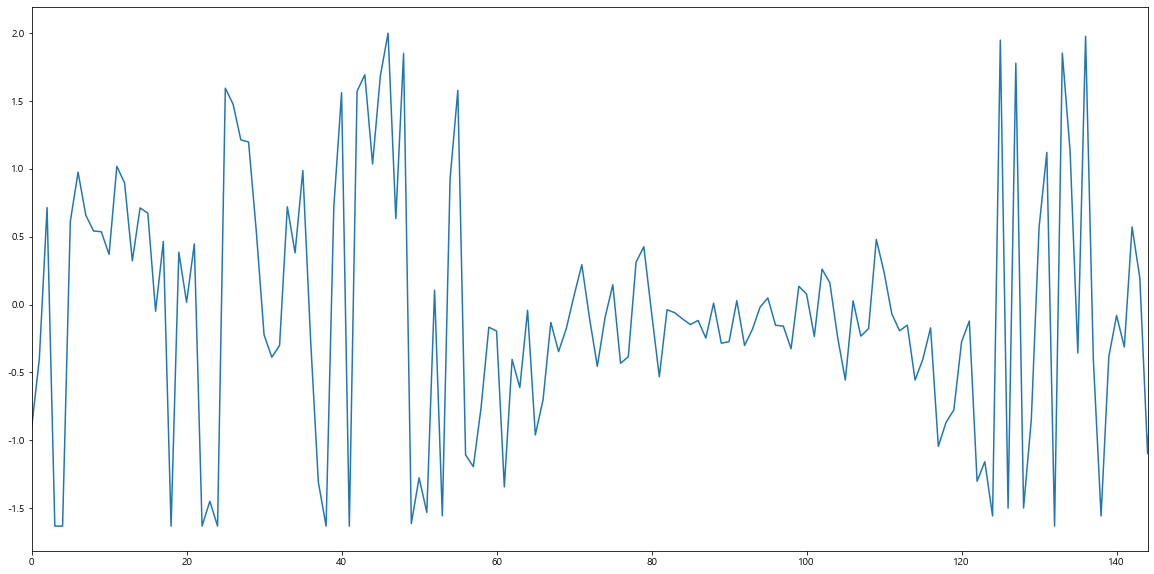

In [43]:
X_train[windD[0]].plot(figsize=(20,10))
plt.xlim(0, 144)